In [49]:
# from table_detection import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import pytesseract


In [50]:
# PARAMETERS
path = 'img/'
proc_path = 'proc_img/'
sp_path = 'sp_img/'
filename = 'image02.png'
sp_filename = filename.split('.')
proc_filename = sp_filename[0] + '_proc.' + sp_filename[1]
plt.style.use('dark_background')

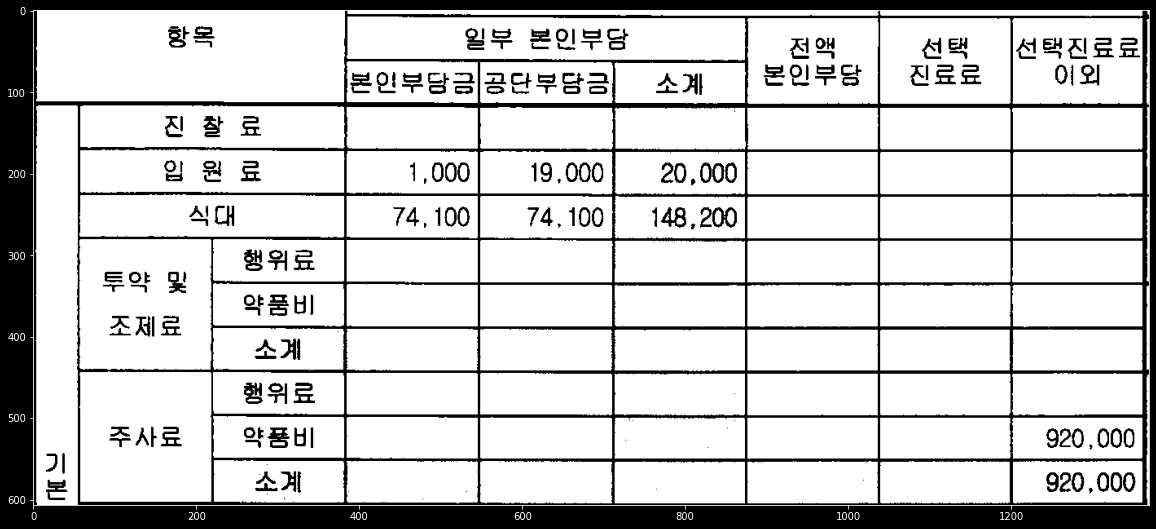

In [51]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_dim = img.shape

# 이진화
bi_thr = 200
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)
cv2.imwrite(proc_path+proc_filename, bi_img)
plt.figure(figsize=[20, 10])
plt.imshow(bi_img, cmap='gray')
plt.show()

In [52]:
bi_img.shape

(607, 1370)

* get mean

In [53]:
row_mean = list()
row_max = list()
row_min = list()
row_idx = [i for i in range(bi_img.shape[0])]
for row_id in row_idx:
    row = bi_img[row_id, :]
    row_mean.append(np.mean(row))
    row_max.append(np.max(row))
    row_min.append(np.min(row))
    

col_mean = list()
col_idx = [i for i in range(bi_img.shape[1])]
for col_id in col_idx:
    col = bi_img[:, col_id]
    col_mean.append(np.mean(col))

* line_id 구하기

In [70]:
min_thr = 0
max_thr = 190
line_row_idx = list()
for idx, value in enumerate(row_mean):
    if min_thr <= value < max_thr:
        line_row_idx.append(idx)
    else:
        pass

line_col_idx = list()
for idx, value in enumerate(col_mean):
    if min_thr <= value < max_thr:
        line_col_idx.append(idx)
    else:
        pass

* 경계선 지우기

In [71]:
def imshow(img):
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

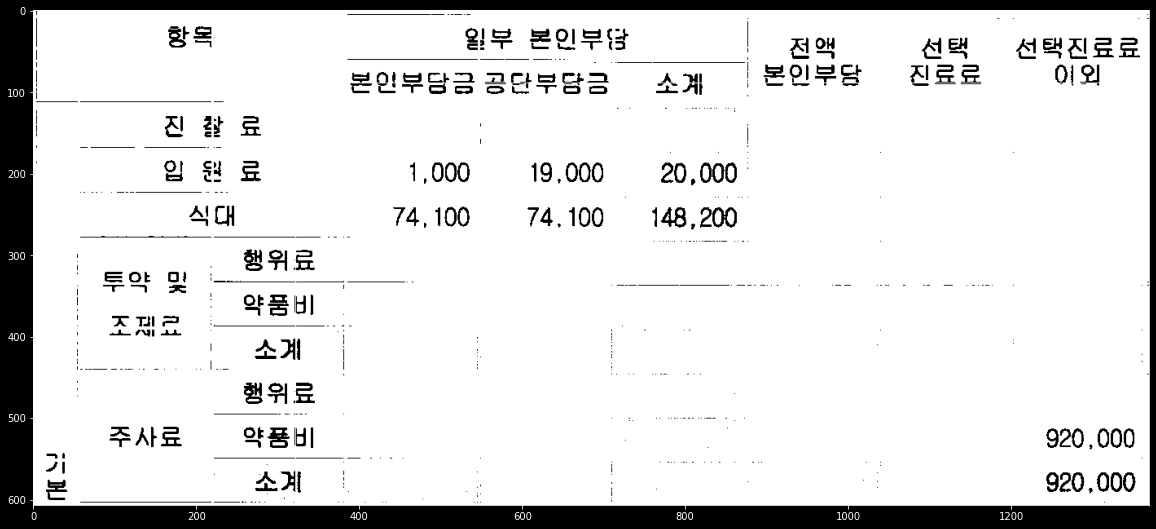

In [72]:
mod_img = copy.deepcopy(bi_img)
for row in line_row_idx:
    mod_img[row] = 255
for col in line_col_idx:
    mod_img[:, col] = 255
imshow(mod_img)

* 텍스트영역 검출

In [80]:
row_mean_idx = np.mean(mod_img, axis=1)
col_mean_idx = np.mean(mod_img, axis=0)

1370